# day 135 and day 136 and day 137 and day 138

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


# Dealing with Non-Linear Data

In [2]:
# creating the non-linear dataset and make a DataFrame out of it.
from sklearn.datasets import make_circles

x,y = make_circles(n_samples=1000, random_state=42,noise=0.03)

dic = {'x0':x[:,0],'x1':x[:,1],'y':y}
df = pd.DataFrame(dic)

# redefining the x and y after updation
x = df.drop('y',axis=1)
y = df['y']

# train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# model building
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(2, activation='tanh'))
model.add(tf.keras.layers.Dense(50,activation='tanh'))
model.add(tf.keras.layers.Dense(50,activation='tanh'))
model.add(tf.keras.layers.Dense(50,activation='tanh'))
model.add(tf.keras.layers.Dense(50,activation='tanh'))
model.add(tf.keras.layers.Dense(1))

# compiling the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
           optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
           metrics=['Accuracy'])


# fit the model
history = model.fit(x_train,y_train,epochs=100,verbose=False)


# evaluate the model
model.evaluate(x_test,y_test)

7/7 [==============================] - 1s 7ms/step - loss: 7.4301 - Accuracy: 0.5150


[7.4301438331604, 0.5149999856948853]

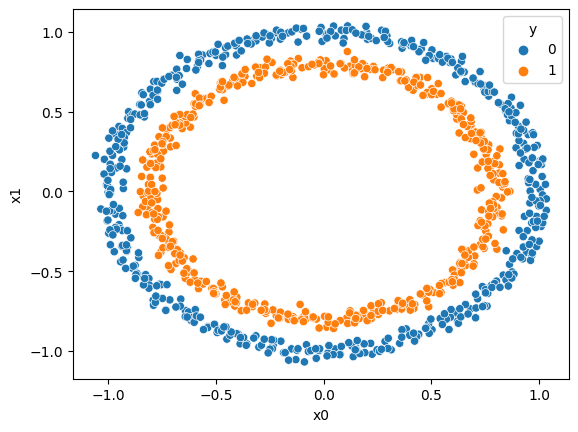

In [ ]:
# plotting

# plt.scatter(df['x0'],df['x1'],c=df['y'],cmap=plt.cm.RdYlBu)

sns.scatterplot(data=df,x='x0',y='x1',hue='y')

plt.show()

In [ ]:
def plot_boundary(df,model,x_train,x_test,y_train,y_test):


  # setting the axis boundary for the meshgrid
  x0_min, x0_max  = x_train['x0'].min()-0.01, x_train['x0'].max()+0.01
  x1_min, x1_max =  x_train['x1'].min()-0.01, x_train['x1'].max()+0.01

  # creating the meshgrid
  xx,yy = np.meshgrid(np.linspace(x0_min,x0_max,100),np.linspace(x1_min,x1_max,100))

  # flatten it
  x_in = np.c_[xx.ravel(),yy.ravel()]

  # prediction
  prediction = model.predict(x_in)


  # reshaping the prediciton based off requirment
  if len(prediction[0]) > 1:

      print('We are doing multi-class classification')

      prediction = np.argmax(prediction,axis=1).reshape(xx.shape)

  else:

      print('We are doing Binary classification')

      prediction = np.round(prediction).reshape(xx.shape)



  # plot the decision boundary:

  plt.contourf(xx,yy,prediction,alpha=0.7,cmap=plt.cm.RdYlBu)
  plt.scatter(x=df['x0'],y=df['x1'],c=df['y'],cmap=plt.cm.RdYlBu,s=40)

  plt.xlim(x0_min,x0_max)
  plt.ylim(x1_min,x1_max)

  plt.show()

313/313 [==============================] - 2s 6ms/step
We are doing Binary classification


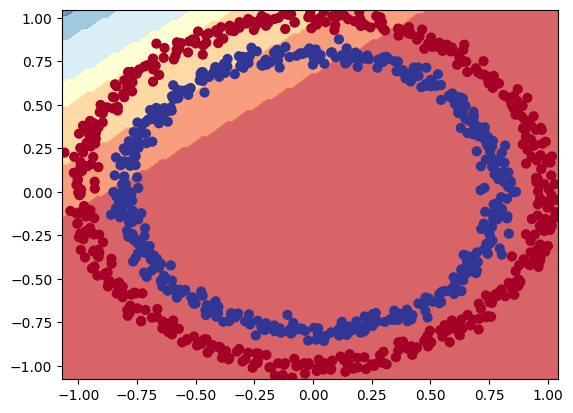

In [ ]:
plot_boundary(df,model,x_train,x_test,y_train,y_test)


# yellow means the being in the middle of red and blue(the probabilistic uncertainty it points to)

# experiment, analysis and freethrows.

In [ ]:
x_in.shape

NameError: ignored

In [ ]:
# prediction before passing conditions
prediction

In [ ]:
len(prediction[0])

In [ ]:
# predicition after passing conditions

np.round(prediction).reshape(xx.shape) # predictions now hodl discrete values.

# improving our model

In [ ]:
# building the model
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(4,activation='tanh'))
model_2.add(tf.keras.layers.Dense(2,activation='tanh'))
model_2.add(tf.keras.layers.Dense(1,activation='softmax'))

# compiling the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


# fit the model
history = model_2.fit(x_train,y_train,epochs=100,verbose=False)

# evaluate the model
model_2.evaluate(x_test,y_test)

In [ ]:
plot_boundary(df,model_2,x_train,x_test,y_train,y_test)

# conclusion:

* it has improved a bit.

# improving the model

In [ ]:
# just as it was in the neural network playground

# setting the random seed
tf.random.set_seed(42)

# building the model
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(4,activation='tanh',name='hidden_layer1'))
model_3.add(tf.keras.layers.Dense(2,activation='tanh',name='hidden_layer2'))
model_3.add(tf.keras.layers.Dense(1,name='output_layer'))

# compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])


# fit the model
history = model_3.fit(x_train,y_train,epochs=250,verbose=False)

# evaluate the model
model_3.evaluate(x_test,y_test)

In [ ]:
plot_boundary(df,model_3,x_train,x_test,y_train,y_test)

# conclusion:
it has improved a lot as we can see

# improving the model



In [ ]:
# setting the randomseed
tf.random.set_seed(42)

# building the model
model_4 = tf.keras.Sequential()
model_4.add(tf.keras.layers.Dense(4,activation='tanh',name='hidden_layer1'))
model_4.add(tf.keras.layers.Dense(2,activation='tanh',name='hidden_layer2'))
model_4.add(tf.keras.layers.Dense(1,activation='sigmoid',name='output_layer'))

# compiling the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# fitting the model
history = model_4.fit(x_train,y_train,epochs=250,verbose=False)

# evaluate the model
model_4.evaluate(x_test,y_test)



In [ ]:
plot_boundary(df,model_4,x_train,x_test,y_train,y_test)

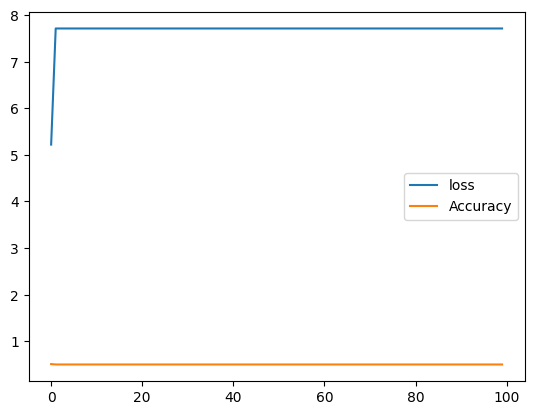

In [ ]:
pd.DataFrame(history.history).plot()

plt.show()

# conclusion:

the most accurate model it is with an accuracy of 100%

# difference between sigmoid and tanh


# tanh:
* the output covers both negative and positive domains of numbers
 (values range between -1 and 1).
* size is considerably larger than sigmoid


# sigmoid:
* the output covers only positive domains ( values range between 0 and 1).
* size is relatively smaller than tanh




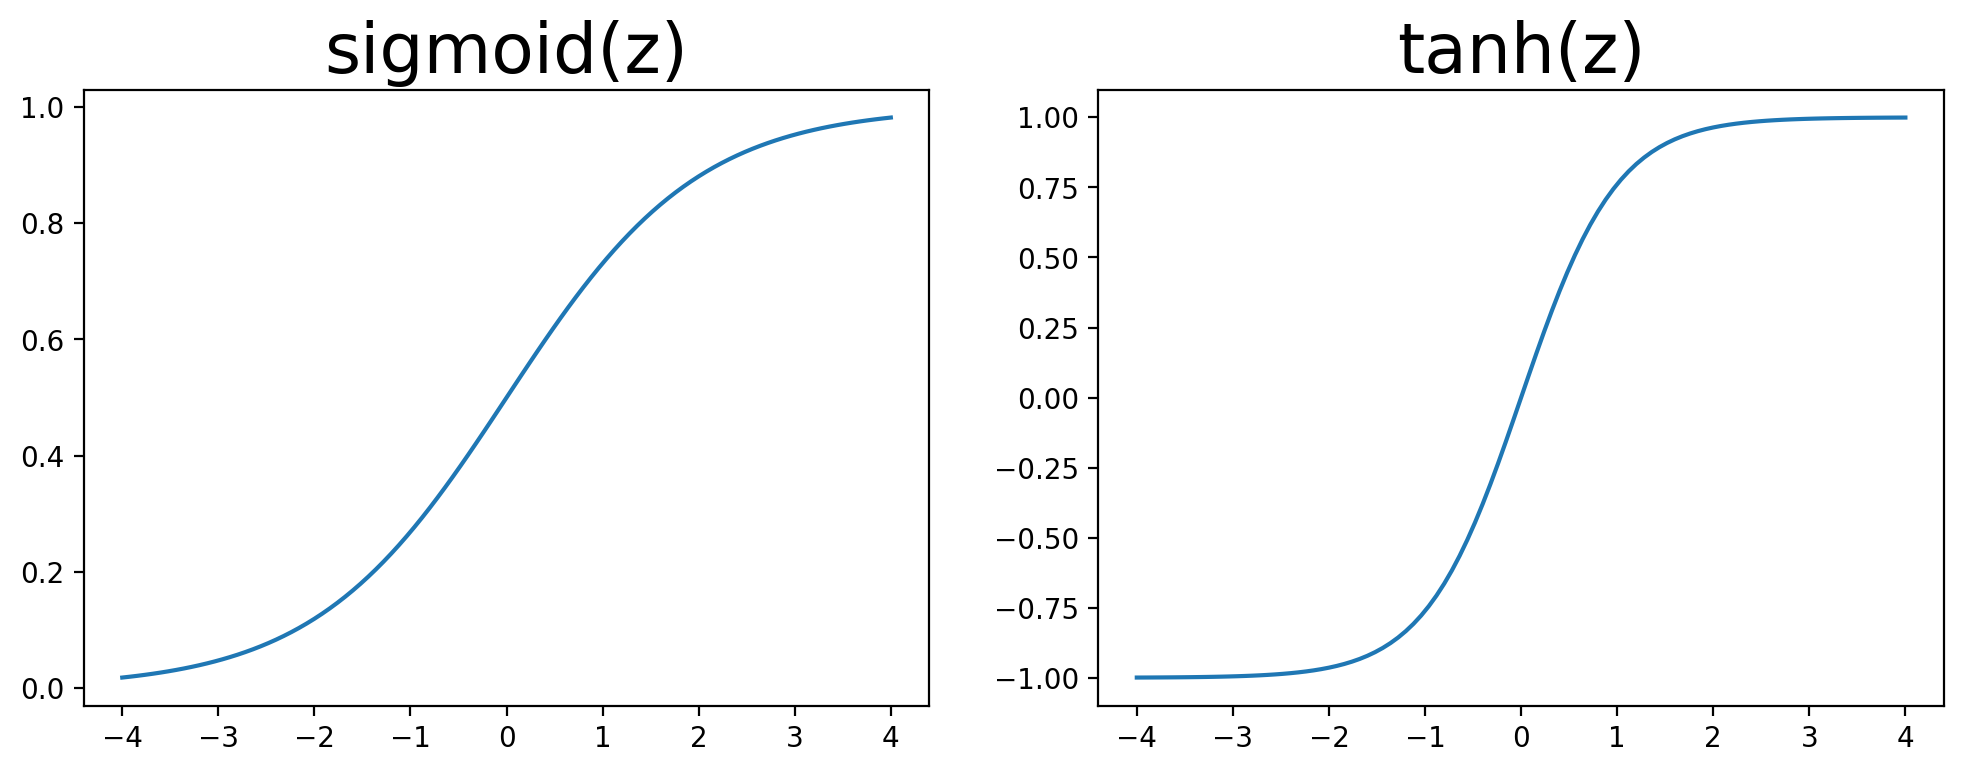

In [ ]:
# setting the real numbers
z = np.linspace(-4,4,101)

sigmoid =     1                     /  (1+np.exp(-z))

tanh    = (np.exp(z) - np.exp(-z))  /  (np.exp(z) + np.exp(-z))

fig,ax = plt.subplots(nrows=1, ncols=2, dpi=200, figsize=(12,4))

ax[0].plot(z,sigmoid)
ax[0].set_title('sigmoid(z)',fontsize=25)

ax[1].plot(z,tanh)
ax[1].set_title('tanh(z)',fontsize=25)
plt.show()

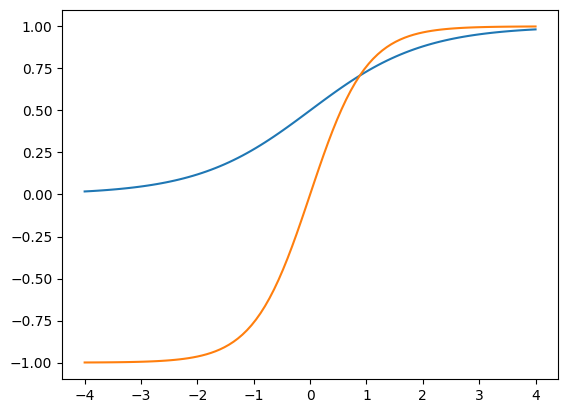

In [ ]:
sigmoid = tf.keras.activations.sigmoid(z)
tanh    = tf.keras.activations.tanh(z)

plt.plot(z,sigmoid)
plt.plot(z,tanh)

plt.show()

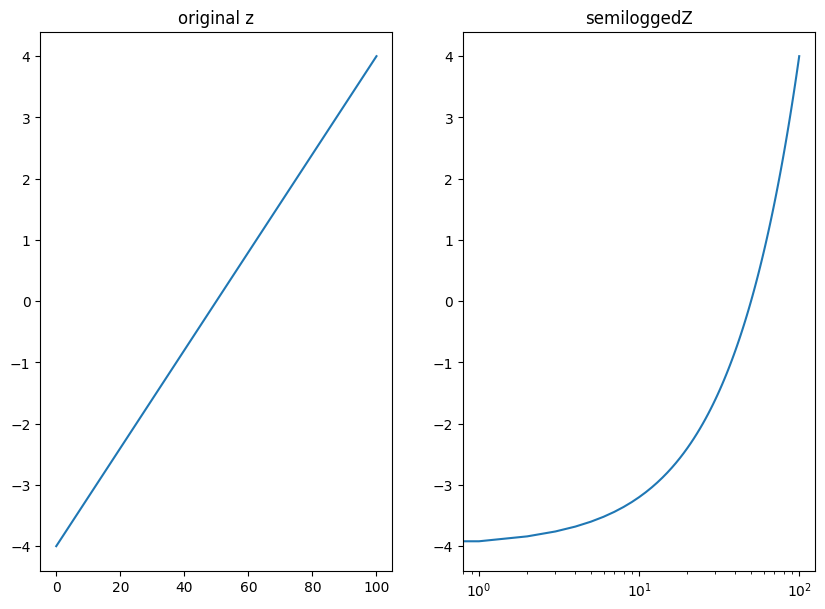

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,7))

ax[0].plot(z)
ax[0].set_title('original z')

ax[1].semilogx(z)
ax[1].set_title('semiloggedZ')

plt.show()

# conclusion:
# what semilogx does to z is it just convert the values to log scaling without changing the original values!

# finding the model's ideal learning rate


# ways to optimize learning rate while training:

1. learning **callback**



In [ ]:
# set the random_seed
tf.random.set_seed(42)

# building the new_model(same as model_4)
model_5 = tf.keras.Sequential()
model_5.add(tf.keras.layers.Dense(4,activation='tanh',name='hidden_layer1'))
model_5.add(tf.keras.layers.Dense(2,activation='tanh',name='hidden_layer2'))
model_5.add(tf.keras.layers.Dense(1,activation='sigmoid',name='output_layer'))


# compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# learning_rate_scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 10**(-4) * 10**(epoch/20))

# fit the model
history_5 = model_5.fit(x_train,y_train,epochs=250,verbose=False,callbacks=[lr_scheduler])

# evaluate the model
model_5.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 62102784.0000 - accuracy: 0.5000


[62102784.0, 0.5]

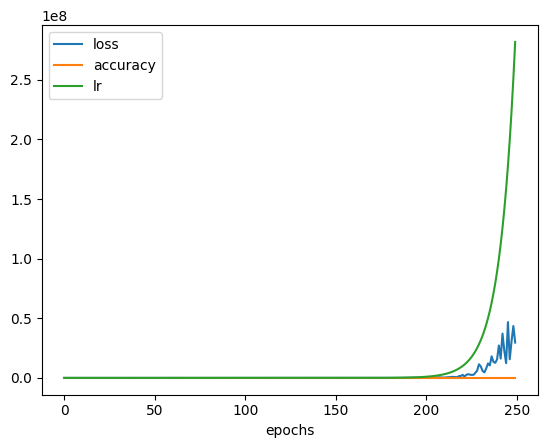

In [ ]:
pd.DataFrame(history_5.history).plot()

plt.xlabel('epochs')
plt.show()

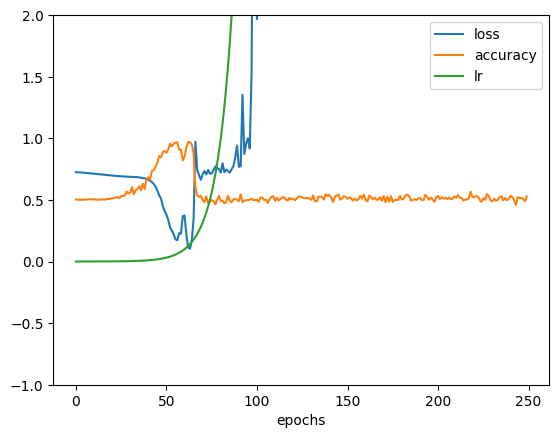

In [ ]:
# zooming in on the plot of history_5

pd.DataFrame(history_5.history).plot()

plt.ylim(-1,2)

plt.xlabel('epochs')
plt.show()

# effecting the change based on observation

**we have observed that at epochs 50ish we got the most optimal performance**

In [ ]:
# set the random_seed
tf.random.set_seed(42)

# building the new_model(same as model_4)
model_5 = tf.keras.Sequential()
model_5.add(tf.keras.layers.Dense(4,activation='tanh',name='hidden_layer1'))
model_5.add(tf.keras.layers.Dense(2,activation='tanh',name='hidden_layer2'))
model_5.add(tf.keras.layers.Dense(1,activation='sigmoid',name='output_layer'))


# compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# learning_rate_scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 10**(-4) * 10**(epoch/20))

# fit the model
history_5 = model_5.fit(x_train,y_train,epochs=50,verbose=False,callbacks=[lr_scheduler])

# evaluate the model
model_5.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4110 - accuracy: 0.8550


[0.41098204255104065, 0.8550000190734863]

# that doesn't seem to have worked very well. lets find out the best learning rate some other way

In [ ]:
history_5.history

{'loss': [0.6939710974693298,
  0.6939565539360046,
  0.6939324140548706,
  0.6939313411712646,
  0.693897008895874,
  0.6938753724098206,
  0.693847119808197,
  0.6938169598579407,
  0.6938076019287109,
  0.6937680840492249,
  0.6937252283096313,
  0.6936936378479004,
  0.6936560869216919,
  0.6936088800430298,
  0.6935765147209167,
  0.693523645401001,
  0.693484365940094,
  0.6934162974357605,
  0.6933896541595459,
  0.6933237314224243,
  0.6932430863380432,
  0.6931823492050171,
  0.6930944919586182,
  0.6930400133132935,
  0.6929606795310974,
  0.6928080916404724,
  0.6926579475402832,
  0.6925722360610962,
  0.6922364234924316,
  0.6919351816177368,
  0.6915714144706726,
  0.6908994913101196,
  0.6902692317962646,
  0.6894777417182922,
  0.6888285279273987,
  0.6867784261703491,
  0.6849989891052246,
  0.6829541921615601,
  0.6806346774101257,
  0.677530825138092,
  0.6745473742485046,
  0.6659696102142334,
  0.6548534631729126,
  0.634162187576294,
  0.6011220812797546,
  0.5508

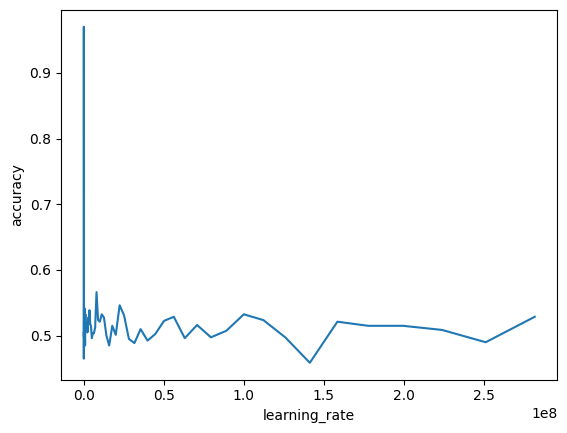

In [ ]:
epochs = 250
lrs = 10**(-4) * (10**(np.arange(epochs)/20))
accuracy = history_5.history['accuracy']


plt.plot(lrs,accuracy)

plt.xlabel('learning_rate')
plt.ylabel('accuracy')


plt.show()

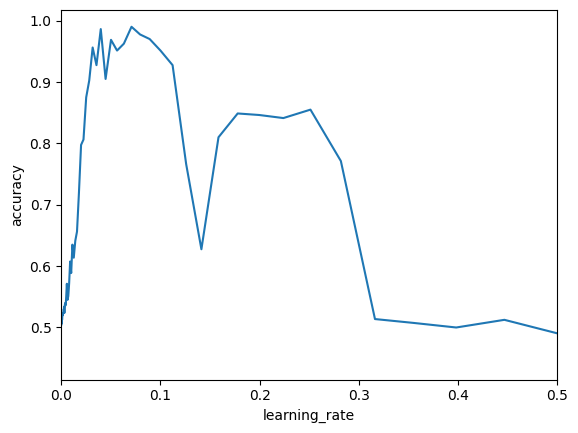

In [ ]:
# zooming in

epochs = 250
lrs = 10**(-4) * (10**(np.arange(epochs)/20))
accuracy = history_5.history['accuracy']


plt.plot(lrs,accuracy)

plt.xlabel('learning_rate')
plt.ylabel('accuracy')

# zooming in on the target:
plt.xlim(0,0.5)

plt.show()

# find the maximum point the plot

In [ ]:
max(accuracy)

0.9700000286102295

In [ ]:
index_of_max = np.argmax(accuracy)

lrs[index_of_max]

0.12589254117941676

In [ ]:
index_of_max

62

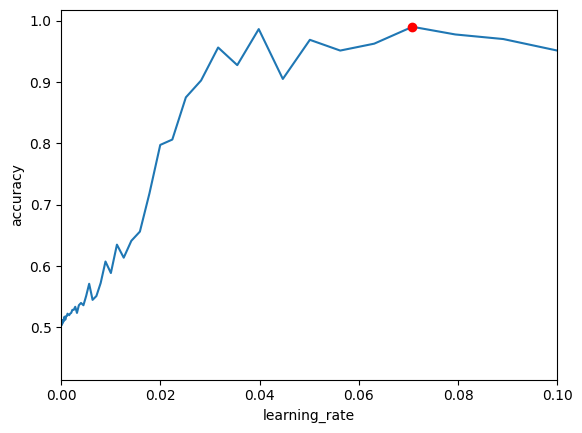

In [ ]:
# zooming in

epochs = 250
lrs = 10**(-4) * (10**(np.arange(epochs)/20))
accuracy = history_5.history['accuracy']


plt.plot(lrs,accuracy)

plt.xlabel('learning_rate')
plt.ylabel('accuracy')

# zooming in on the target:
plt.xlim(0,0.1)



# find the maximum point the plot
index_of_max_of_accuracy = np.argmax(accuracy)

plt.plot(lrs[index_of_max_of_accuracy],accuracy[index_of_max_of_accuracy],'ro')

plt.show()

In [ ]:
lrs[index_of_max_of_accuracy]

0.0707945784384138

# modifying the model

In [ ]:
# random seed setting
tf.random.set_seed(42)

# building the model
model_6 = tf.keras.Sequential()
model_6.add(tf.keras.layers.Dense(4,activation='tanh',   name='hidden_layer1'))
model_6.add(tf.keras.layers.Dense(2,activation='tanh',   name='hidden_layer2'))
model_6.add(tf.keras.layers.Dense(1,activation='sigmoid',name='output_layer'))


# compilation
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=lrs[index_of_max_of_accuracy]),
                metrics=['accuracy'])

# fitting the model
model_6.fit(x_train,y_train,epochs=100,verbose=False)


# evaluation
model_6.evaluate(x_test,y_test)


7/7 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9950


[0.01474528294056654, 0.9950000047683716]

# 0.07 learning rate is when the accuracy was max but we want to use the learning rate where the accuracy is not max yet but reaching closer and closer! something like 0.03,0.04,0.05 might work very well.

In [3]:
# random seed setting
tf.random.set_seed(42)

# building the model
model_6 = tf.keras.Sequential()
model_6.add(tf.keras.layers.Dense(4,activation='tanh',   name='hidden_layer1'))
model_6.add(tf.keras.layers.Dense(2,activation='tanh',   name='hidden_layer2'))
model_6.add(tf.keras.layers.Dense(1,activation='sigmoid',name='output_layer'))


# compilation
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
                metrics=['accuracy'])

# fitting the model
history6 = model_6.fit(x_train,y_train,epochs=100,verbose=False)


# evaluation
model_6.evaluate(x_test,y_test)


7/7 [==============================] - 1s 7ms/step - loss: 0.0150 - accuracy: 1.0000


[0.015035119839012623, 1.0]

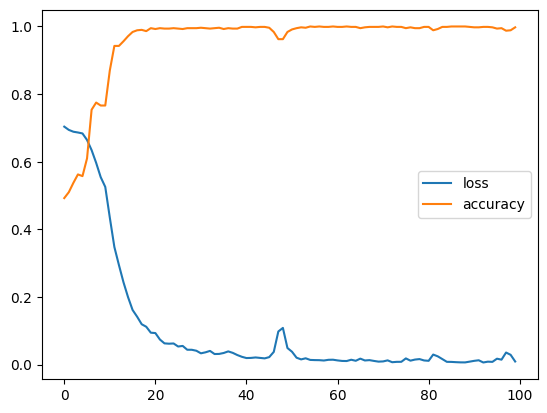

In [4]:
pd.DataFrame(history6.history).plot()

plt.show()

In [5]:
def plot_boundary(model,x,y):


  # setting the axis boundary for the meshgrid
  x0_min, x0_max  = x['x0'].min()-0.01, x['x0'].max()+0.01
  x1_min, x1_max =  x['x1'].min()-0.01, x['x1'].max()+0.01

  # creating the meshgrid
  xx,yy = np.meshgrid(np.linspace(x0_min,x0_max,100),np.linspace(x1_min,x1_max,100))

  # flatten it
  x_in = np.c_[xx.ravel(),yy.ravel()]

  # prediction
  prediction = model.predict(x_in)


  # reshaping the prediciton based off requirment
  if len(prediction[0]) > 1:

      print('We are doing multi-class classification')

      prediction = np.argmax(prediction,axis=1).reshape(xx.shape)

  else:

      print('We are doing Binary classification')

      prediction = np.round(prediction).reshape(xx.shape)



  # plot the decision boundary:

  plt.contourf(xx,yy,prediction,alpha=0.7,cmap=plt.cm.RdYlBu)
  plt.scatter(x=df['x0'],y=df['x1'],c=df['y'],cmap=plt.cm.RdYlBu,s=40)

  plt.xlim(x0_min,x0_max)
  plt.ylim(x1_min,x1_max)

  plt.show()

313/313 [==============================] - 0s 1ms/step
We are doing Binary classification


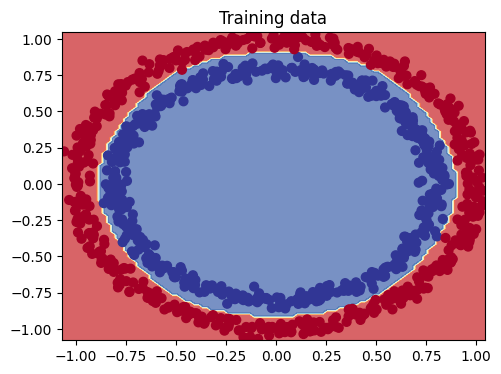

313/313 [==============================] - 0s 1ms/step
We are doing Binary classification


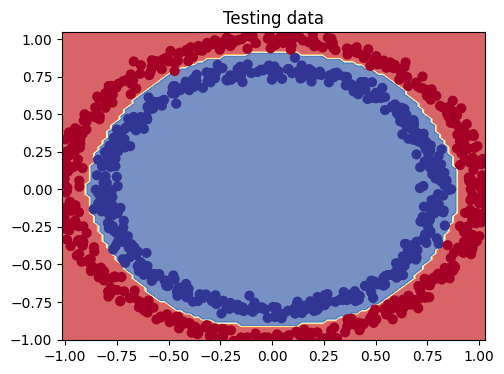

In [6]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Training data')
plot_boundary(model_6,x_train,y_train)

plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.title('Testing data')
plot_boundary(model_6,x_test,y_test)


plt.show()

# accuracy,precision and recall and f1 score

* tp: true postive
* tn: true negative
* fp: false positive
* fn: false negative

# accuracy:

# $$ \text{accuracy = } \frac{tp+tn}{tp+tn+fp+fn} $$

# precision:

# $$ \text{precision = } \frac{tp}{tp+fp} $$


# recall:

# $$ \text{recall = } \frac{tp}{tp+fn} $$

# f1 score:

# $$ \text{f1 score = } 2* \frac{\text{precision * recall} }{\text{precision + recall} } $$




# creating a confusion matrix to see where our model is getting confused

In [7]:
from sklearn.metrics import confusion_matrix,classification_report

actual = y_test
prediction = model_6.predict(x_test)


confusion_matrix(actual,prediction)


7/7 [==============================] - 0s 3ms/step


ValueError: ignored

# the error is due to the output from the sigmoid activation function comes out in the form of probability whereas the actual data has discrete 1's and 0's so we now have to convert the output into either 1 or 0 based on their closeness to 1 and zero. so we use a rounding function.

In [8]:
actual = y_test
prediction = np.round(model_6.predict(x_test),0)

confusion_matrix(actual,prediction)



7/7 [==============================] - 0s 2ms/step


array([[100,   0],
       [  0, 100]])

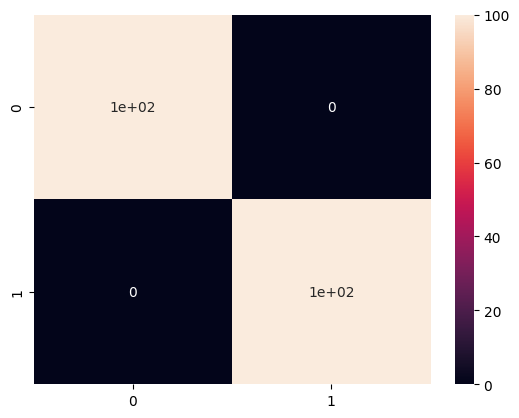

In [11]:
# display it.
sns.heatmap(confusion_matrix(actual,prediction),annot=True)

plt.show()

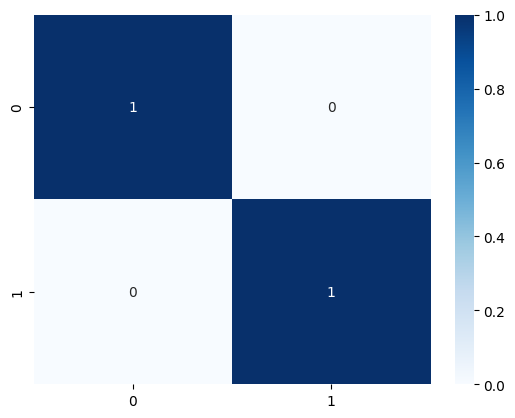

In [35]:

cm = confusion_matrix(actual,prediction)
cm_norm = cm/np.sum(cm,axis=1)

sns.heatmap(cm_norm,annot=True,cmap='Blues')

plt.show()

In [12]:
# show the classification_report

print(classification_report(actual,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# instructor taught confusion-matrix

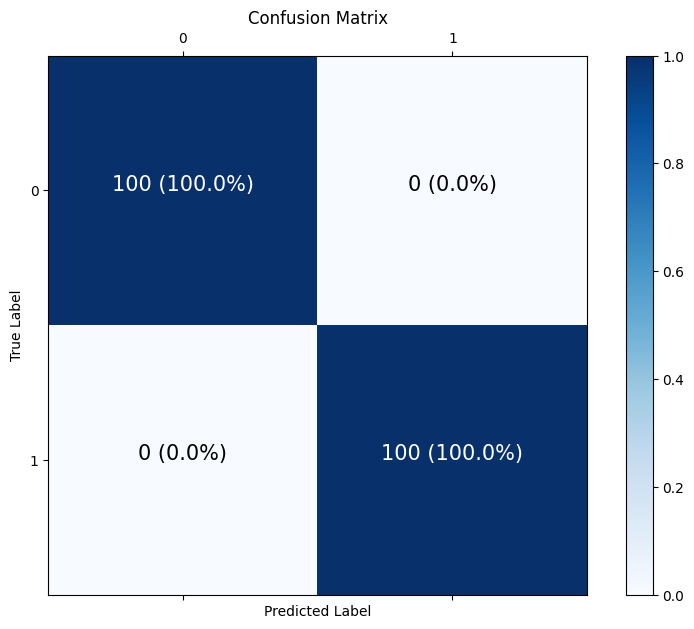

In [42]:
import itertools

# taking the confusion_matrix in cm
cm = confusion_matrix(actual,prediction)

# normalizing the confusion matrix
cm_norm = cm/np.sum(cm,axis=1)

n_classes = cm.shape[0] # gets 2

# plotting
fig,ax = plt.subplots(figsize=(10,7))

# create a matrix plot
cax = ax.matshow(cm_norm,cmap=plt.cm.Blues)
fig.colorbar(cax)


# create Classes
classes = False

if classes:
  labels = classes

else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title='Confusion Matrix',
       xlabel='Predicted Label',
       ylabel='True Label',
       xticks=np.arange(cm.shape[0]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=labels,
       yticklabels=labels)

# set threshold for different colors
threshold = (cm_norm.max() + cm_norm.min())/2

# plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment='center',
           color='white' if cm[i,j] > threshold else 'black',
           size=15)


plt.show()

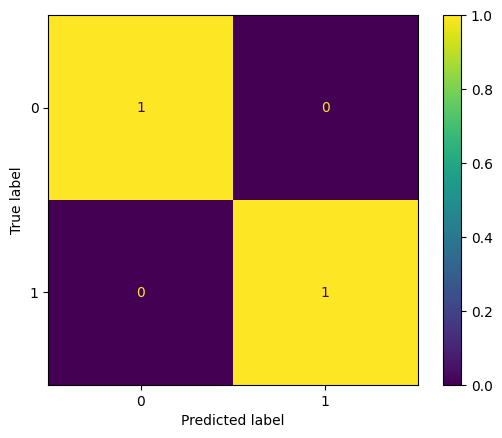

In [44]:
# a student's solution:

from  sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
...
# model code and prediction
...

ConfusionMatrixDisplay(cm_norm)


# experiment, analysis and freethrows:

In [13]:
cm_norm

array([[1., 0.],
       [0., 1.]])

In [14]:
cm.astype('float')

array([[100.,   0.],
       [  0., 100.]])

In [15]:
cm.astype('float')/cm.sum(axis=1)

array([[1., 0.],
       [0., 1.]])

In [18]:
type(cm.astype('float')/cm.sum(axis=1))

numpy.ndarray

In [16]:
cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]

array([[1., 0.],
       [0., 1.]])

In [20]:
# when to use np.newaxis

x = np.array([1,2,3,4,5])

x

array([1, 2, 3, 4, 5])

In [21]:
x[:,np.newaxis]
# np.newaxis adds an extra dimension

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [22]:
x[np.newaxis:,]

# np.newaxis adds an extra dimension.

array([1, 2, 3, 4, 5])

In [23]:
cm.shape

(2, 2)

In [36]:
np.arange(cm.shape[0])

array([0, 1])

In [39]:
(cm.max() + cm.min())/2

50.0

# conclusion:

**model_6 performs really really really well!**